In [243]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from numpy import random
import datetime

import functools
import seaborn as sns

In [110]:
house_files = (('house_1_avg_60.csv', 'house_1_avg_900.csv'),
               ('house_2_avg_60.csv', 'house_2_avg_900.csv'),
               ('house_3_avg_60.csv', 'house_3_avg_900.csv'),
               ('house_4_avg_60.csv', 'house_4_avg_900.csv'),
               ('house_5_avg_60.csv', 'house_5_avg_900.csv'),
               ('house_6_avg_60.csv', 'house_6_avg_900.csv'))



In [150]:
house_frames = []


for pair in house_files:
    instancne_frames = []
    for file in pair:
        act_df = pd.read_table(file, parse_dates=True,
                               header=0,
                               index_col=0,
                               sep=",",
                               decimal=".")
        act_df = act_df.fillna(0)
        instancne_frames.append(act_df)
    house_frames.append(instancne_frames)

In [59]:
#figsize=(15,15)
#f, axarr = plt.subplots(len(files), 1)
#f.set_size_inches(10, 10)

#for i in range(len(files)):
#    axarr[i].plot(house_1_frames[i])
#    axarr[i].set_title('House {0}'.format(i+1))
    


#plt.tight_layout()

In [270]:
def pie_processing(series, threshold=0.02):
    sum_series = sum(series)
    processed_indexes = []
    processed_values = []
    other_values = [0]
    for index, value in series.iteritems():
        act_percent = value / sum_series
        if act_percent < threshold:
            other_values.append(value)
            continue
        processed_indexes.append(index)
        processed_values.append(value)
    processed_indexes.append('Others')
    processed_values.append(sum(other_values))
    processed_series = pd.Series(processed_values, index=processed_indexes)
    return processed_series



In [271]:
house_sums = []

for house in house_frames:
    act_frames = []
    for frame in house:
        act_sum = frame.sum()[2:]
        act_sum.sort_values(inplace=True, ascending=False)
        act_sum = pie_processing(act_sum)
        act_frames.append(act_sum)
    house_sums.append(act_frames)

In [263]:
#df_copy = house_1_frames[0].copy()

In [264]:
#col_names = [df_copy.columns[i] for i in range(2, len(df_copy.columns))] 
#df_copy['sum_test'] = df_copy[col_names].sum(axis=1)

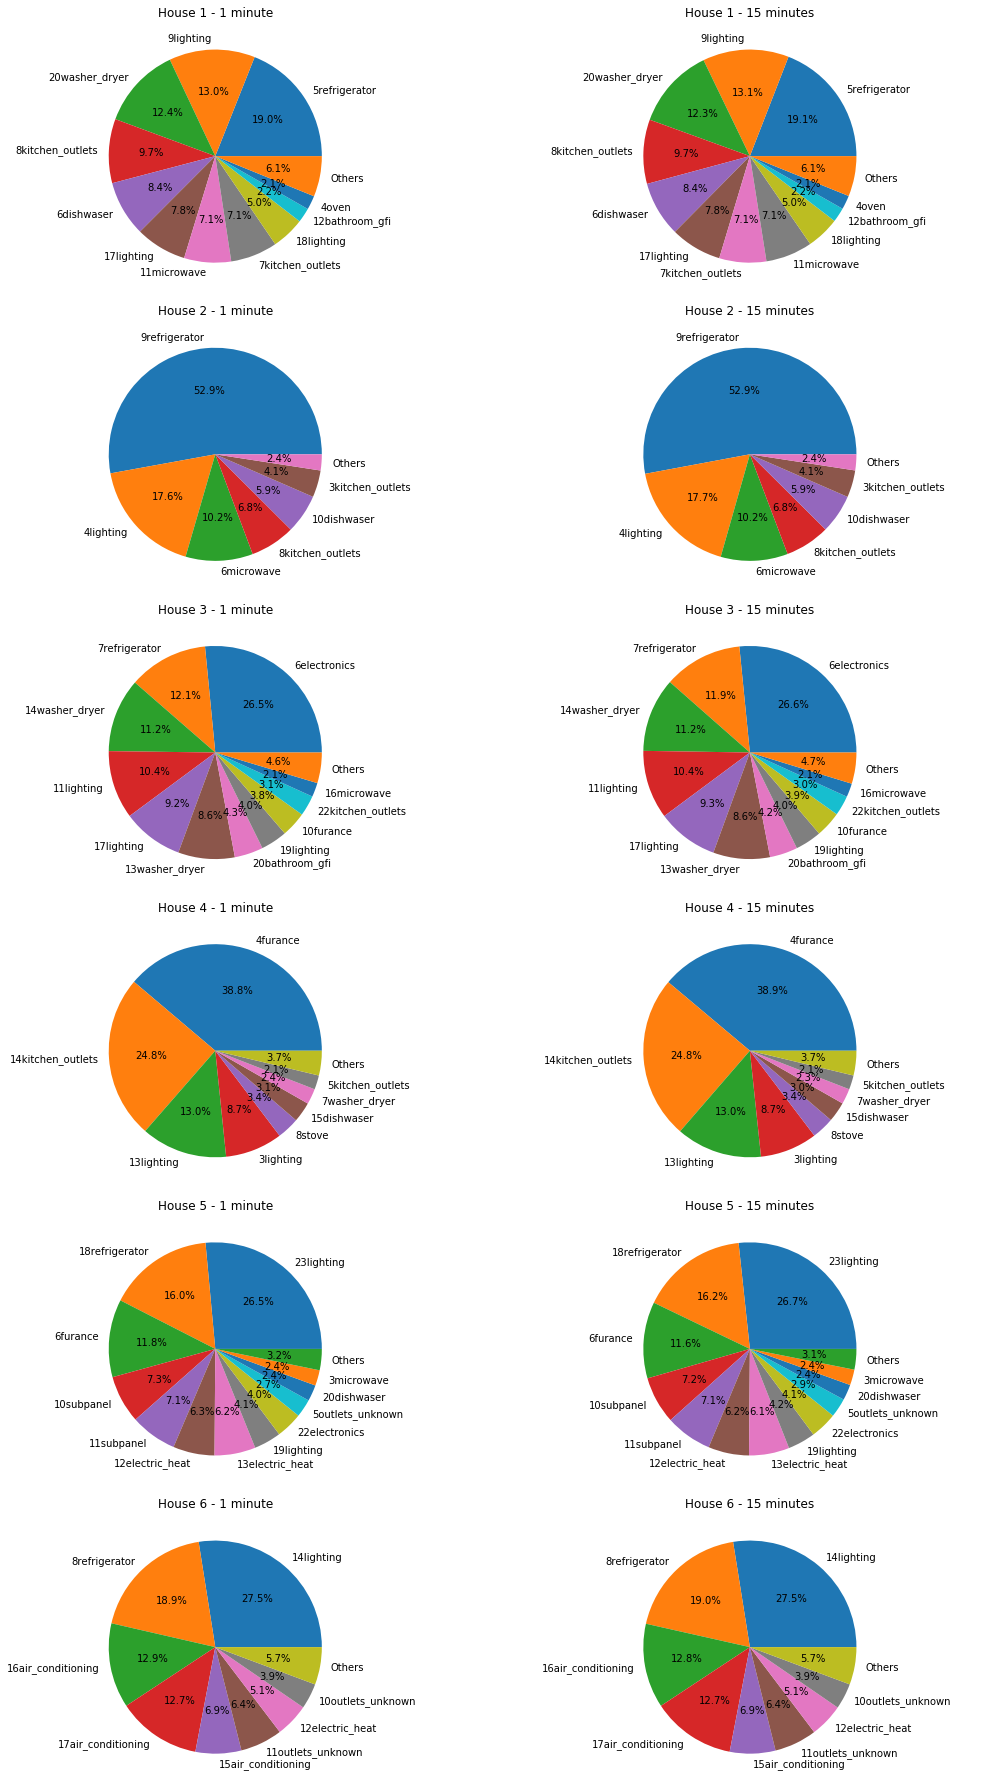

In [272]:

f, axarr = plt.subplots(6, 2, figsize=(15, 25))
#f.set_size_inches(10, 20)
f.tight_layout()

for i in range(6):
    #plt.pie(x=house_1_sums[0], labels=house_1_sums[0].index, autopct='%1.1f%%', shadow=True, startangle=0)
 
    plt.axis('equal')
    axarr[i, 0].pie(x=house_sums[i][0], labels=house_sums[i][0].index, autopct='%1.1f%%', shadow=False, startangle=0)
    axarr[i, 0].set_title('House {0} - 1 minute'.format(i+1))
    axarr[i, 0].set_aspect(aspect=True)
    axarr[i, 1].pie(x=house_sums[i][1], labels=house_sums[i][1].index, autopct='%1.1f%%', shadow=False, startangle=0)
    axarr[i, 1].set_title('House {0} - 15 minutes'.format(i+1))
    axarr[i, 1].set_aspect(aspect=True)
